In [112]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sklearn
from pathlib import Path

%load_ext watermark
%watermark --iversions

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
matplotlib: 3.8.0
numpy     : 1.25.2
sklearn   : 1.3.1
pandas    : 2.1.1



### Exercise 1: Visualise the data

In [113]:
filepath = Path("../data/clustering/cluster02_1000_2_3.dat")
filepath

PosixPath('../data/clustering/cluster02_1000_2_3.dat')

In [114]:
dat = np.genfromtxt(filepath, delimiter=';', usecols=(0,1))
print(dat)

[[1.00000000e+03 2.00000000e+00]
 [2.36620309e+00 1.75134003e+00]
 [2.12033283e+00 2.06516796e+00]
 ...
 [1.58438415e-01 1.12572367e+00]
 [1.84206434e+00 1.90511837e-01]
 [7.71700567e-01 8.69864537e-01]]


In [115]:
n = dat[0][0].astype(int)
d = dat[0][1].astype(int)
points = dat[1:]
print(f'{n=}, {d=}\n{points.shape}')

n=1000, d=2
(1000, 2)


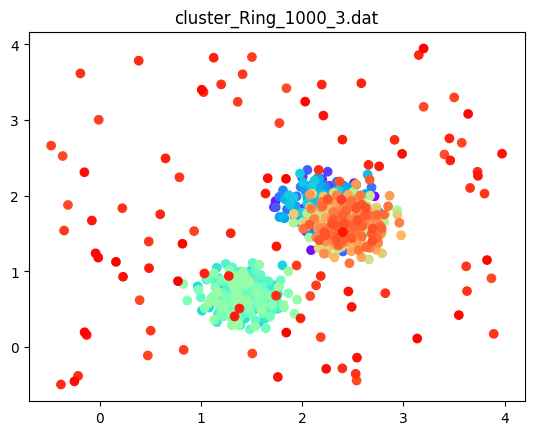

In [116]:
colors = plt.cm.rainbow(np.linspace(0, 1, n))
plt.scatter(points[:, 0], points[:, 1], c=colors)
plt.title(f"{file}")
plt.show()

In [117]:
def load_dat(filepath, dim=2):
    
    if filepath.name.split("/")[-1] == "cluster_100_2_2.dat":
        points = np.genfromtxt(filepath, delimiter=';', usecols=(0,1))
        n, d = points.shape
    else:
        dat = np.genfromtxt(filepath, delimiter=';', usecols=range(dim))
        n = dat[0][0].astype(int)
        d = dat[0][1].astype(int)
        points = dat[1:]

    assert (n, d) == points.shape, f"Shape missmatch in {filepath.name}: {n=}, {d=}, {points.shape=}"
    
    return n, d, points

In [118]:
two_dim = []
three_dim = []

datadir = Path("../data/clustering/")

for filepath in datadir.glob('*.dat'):
    if filepath.name.split('_')[-2] == '3':
        three_dim.append(filepath)
    else:
        two_dim.append(filepath)
        
len(two_dim), len(three_dim)

(18, 4)

***Scatter plots of the 2d points***

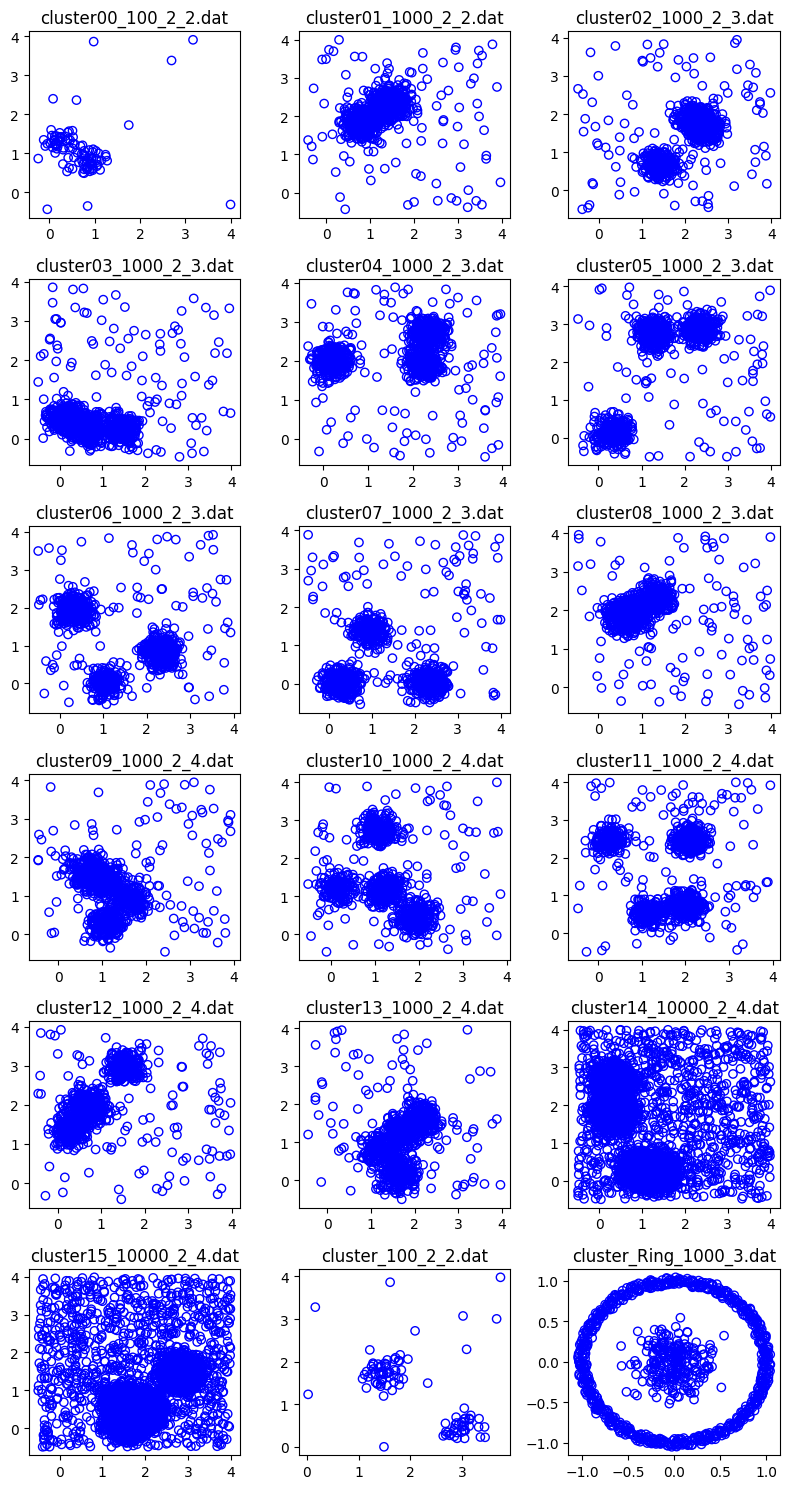

In [119]:
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(8,15))
for filepath, ax in zip(sorted(two_dim), axs.flatten()):
    n, p, points = load_dat(filepath, dim=2)

    ax.scatter(points[:, 0], points[:, 1], facecolors ='none', edgecolors='b')
    ax.set_title(f"{filepath.name}")
plt.tight_layout()

***Scatter plots of the 3d points***

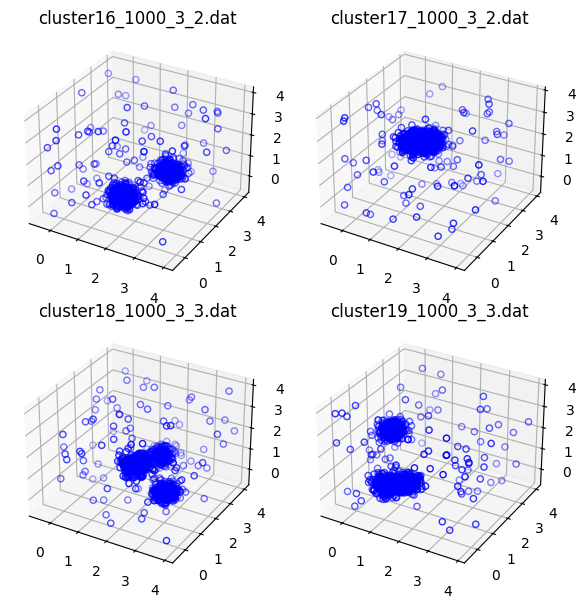

In [120]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(6,6), subplot_kw={'projection':'3d'})

for filepath, ax in zip(sorted(three_dim), axs.flatten()):
    n, p, points = load_dat(filepath, dim=3)

    ax.scatter(points[:, 0], points[:, 1], points[:, 2], facecolors ='none', edgecolors='b')
    ax.set_title(f"{filepath.name}")
    
plt.tight_layout()

### Exercise 2: Run clustering algorithms from scikit-learn

In [121]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

***Single dataset example***

In [122]:
filepath = Path("../data/clustering/cluster02_1000_2_3.dat")

In [123]:
n, d, points = load_dat(filepath)
print(n,d,points)

1000 2 [[2.36620309 1.75134003]
 [2.12033283 2.06516796]
 [2.3297321  1.99974666]
 ...
 [0.15843841 1.12572367]
 [1.84206434 0.19051184]
 [0.77170057 0.86986454]]


In [124]:
filepath.name.split("_")

['cluster02', '1000', '2', '3.dat']

In [125]:
n_clusters = int(filepath.name.split("_")[-1][0])
print(n_clusters)

3


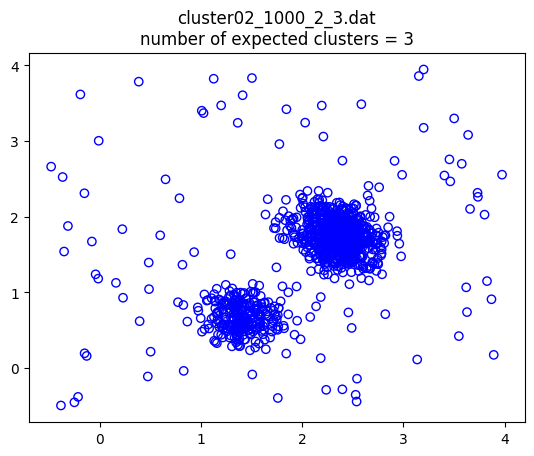

In [126]:
plt.scatter(points[:,0], points[:,1], facecolors ='none', edgecolors='b')
plt.title(f"{filepath.name}\nnumber of expected clusters = {n_clusters}")
plt.show()

In [127]:
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
hierarchical.fit(points)

AgglomerativeClustering(n_clusters=3)

In [128]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42) 
kmeans.fit(points)

/home/kazi/Works/Dtu/data-science-computational-tools/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [129]:
dbscan = DBSCAN(eps=0.25) #eps is max distance between points for the same cluster
dbscan.fit(points)

DBSCAN(eps=0.25)

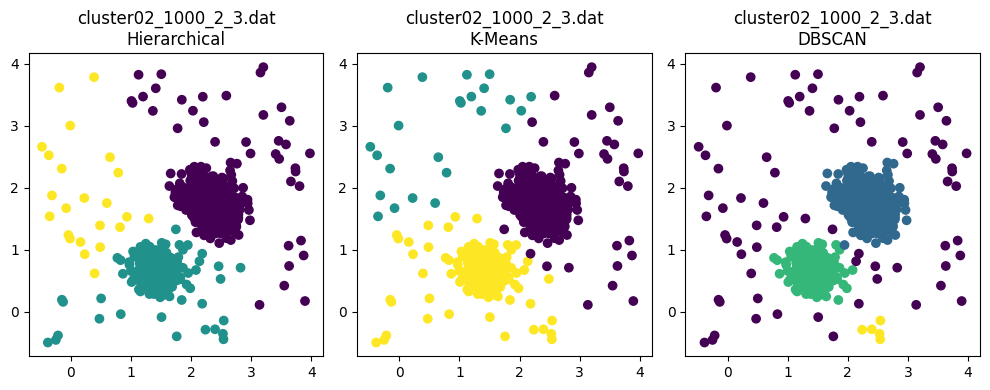

In [130]:
fig, axs = plt.subplots(ncols=3, figsize=(10,4))

axs[0].scatter(points[:,0], points[:,1], c=hierarchical.labels_)
axs[0].set_title(f"{filepath.name}\nHierarchical")

axs[1].scatter(points[:,0], points[:,1], c=kmeans.labels_)
axs[1].set_title(f"{filepath.name}\nK-Means")

axs[2].scatter(points[:,0], points[:,1], c=dbscan.labels_)
axs[2].set_title(f"{filepath.name}\nDBSCAN")

plt.tight_layout()

***Multiple datasets***

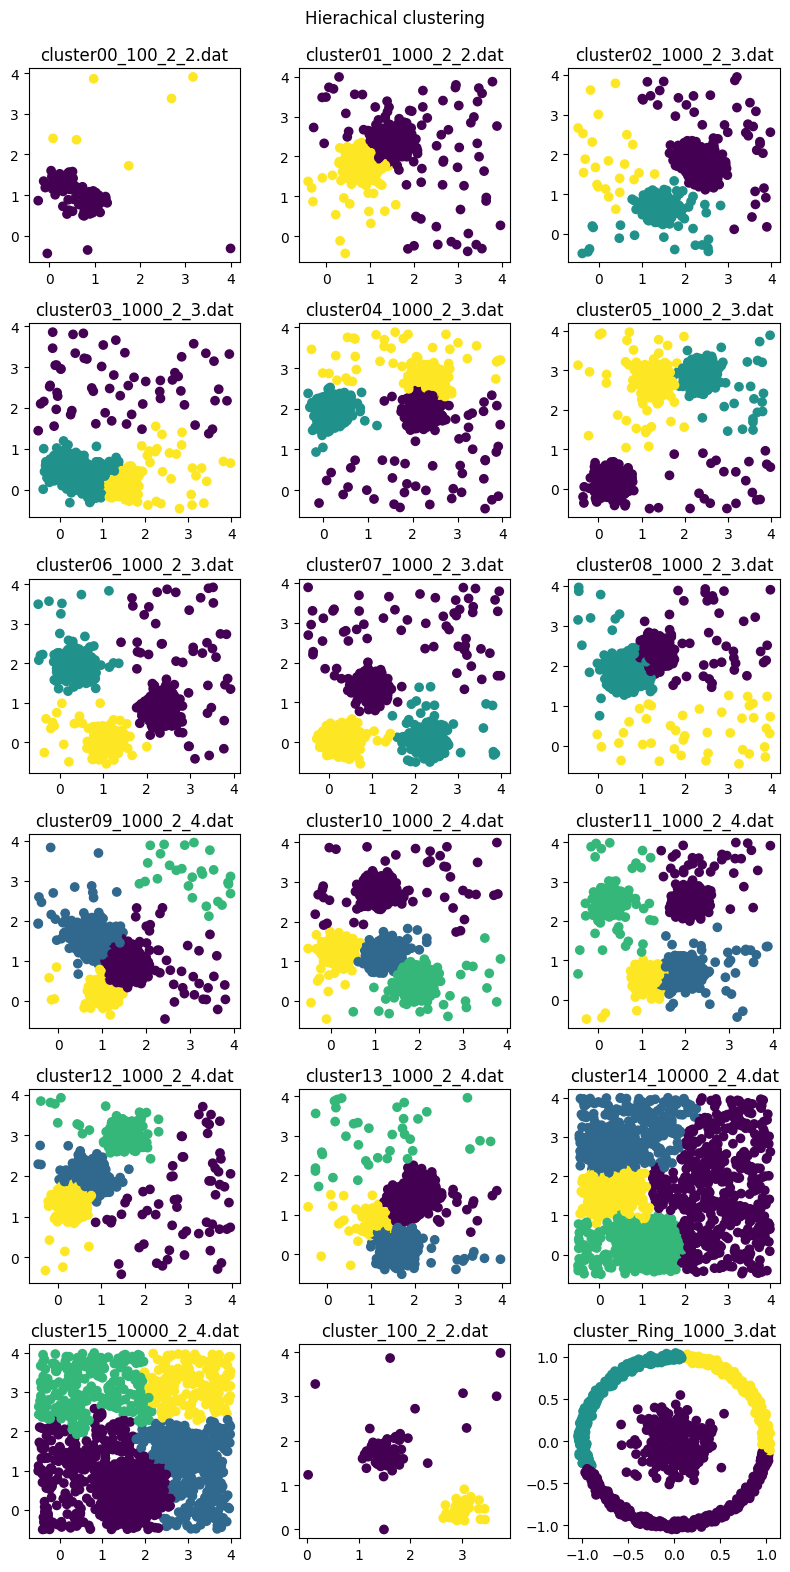

In [131]:
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(8,16))

plt.suptitle("Hierachical clustering\n")

for filepath, ax in zip(sorted(two_dim), axs.flatten()):
    n, p, points = load_dat(filepath, dim=2)
    
    n_clusters = int(filepath.name.split("_")[-1][0])
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    hierarchical.fit(points)

    ax.scatter(points[:, 0], points[:, 1], c=hierarchical.labels_)
    ax.set_title(f"{filepath.name}")
    
plt.tight_layout()

/home/kazi/Works/Dtu/data-science-computational-tools/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kazi/Works/Dtu/data-science-computational-tools/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kazi/Works/Dtu/data-science-computational-tools/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kazi/Works/Dtu/data-science-comput

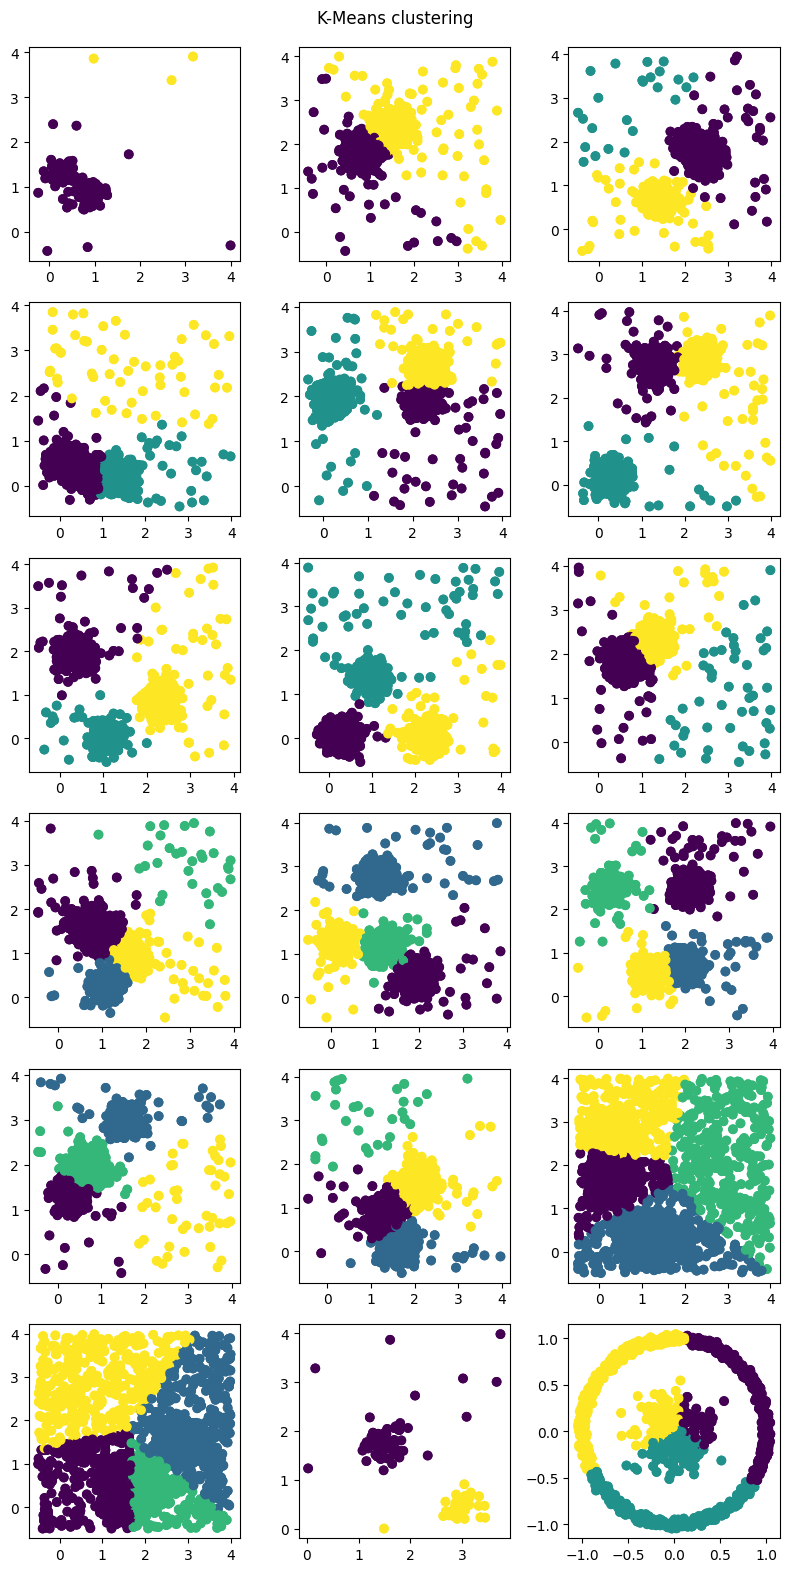

In [132]:
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(8,16))
plt.suptitle("K-Means clustering\n")
for filepath, ax in zip(sorted(two_dim), axs.flatten()):
    n, p, points = load_dat(filepath, dim=2)
    n_clusters = int(filepath.name.split("_")[-1][0])
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(points)
    ax.scatter(points[:, 0], points[:, 1], c=kmeans.labels_)
    ax.scatter(points[:, 0], points[:, 1], c=kmeans.labels_)
plt.tight_layout()

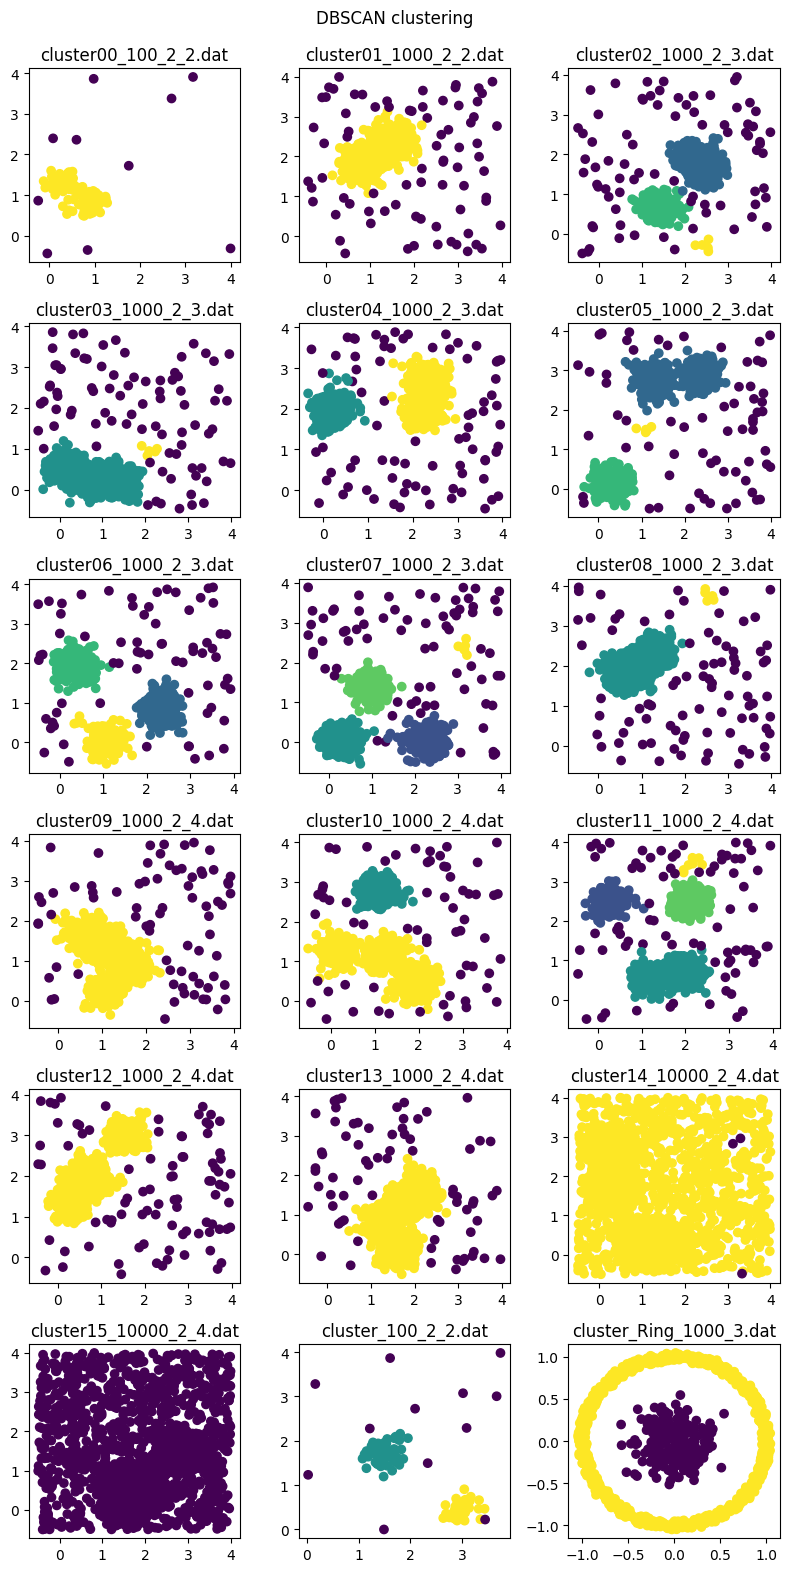

In [133]:
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(8,16))
plt.suptitle("DBSCAN clustering\n")
for filepath, ax in zip(sorted(two_dim), axs.flatten()):
    n, p, points = load_dat(filepath, dim=2)
    
    n_clusters = int(filepath.name.split("_")[-1][0])
    dbscan = DBSCAN(eps=0.25) #eps is max distance between points for the same cluster
    dbscan.fit(points)

    ax.scatter(points[:, 0], points[:, 1], c=dbscan.labels_)
    ax.set_title(f"{filepath.name}")
    
plt.tight_layout()

/home/kazi/Works/Dtu/data-science-computational-tools/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kazi/Works/Dtu/data-science-computational-tools/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kazi/Works/Dtu/data-science-computational-tools/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kazi/Works/Dtu/data-science-comput

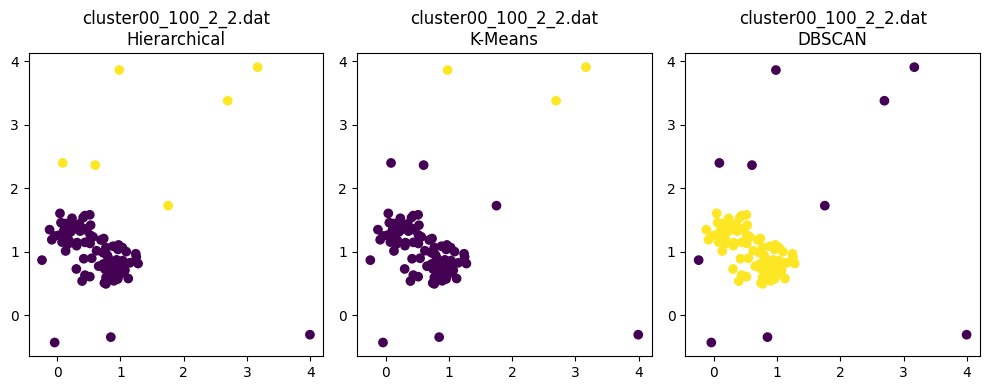

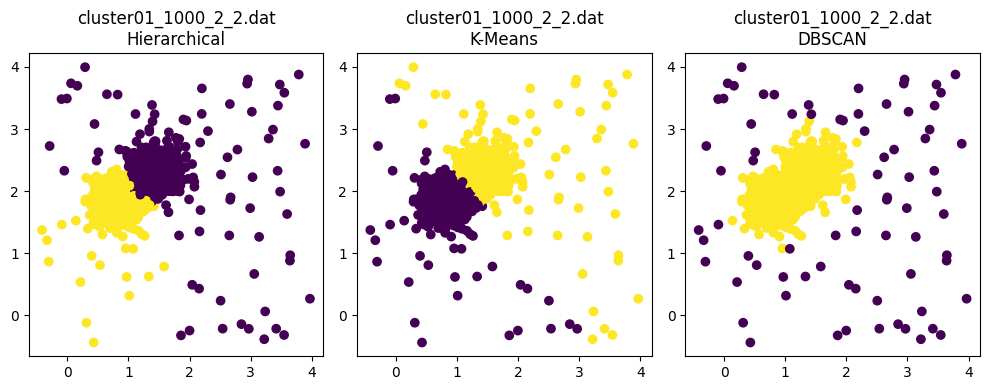

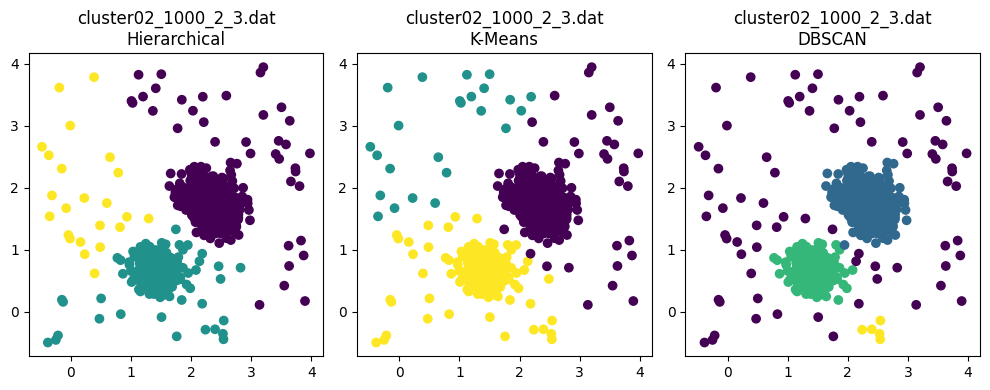

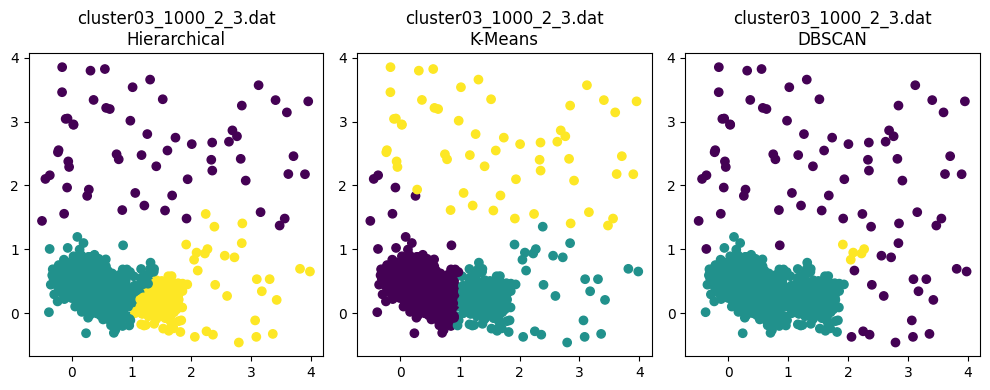

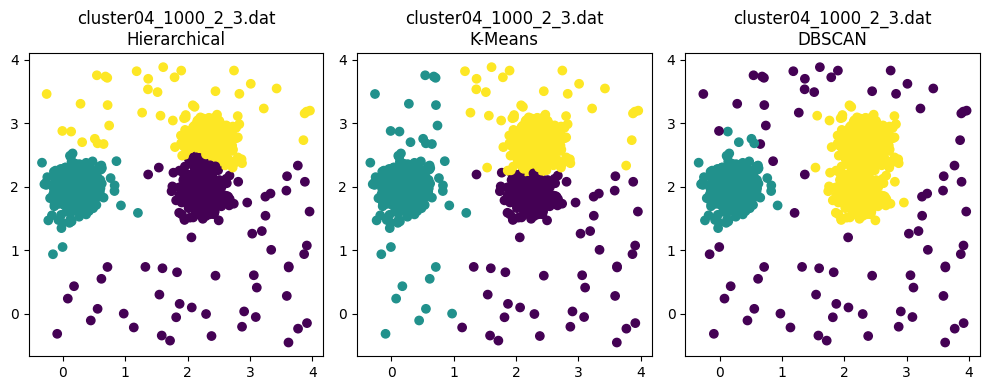

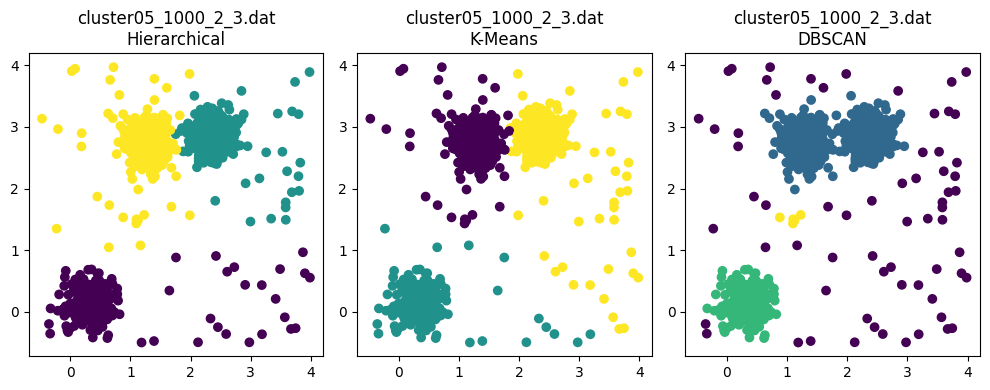

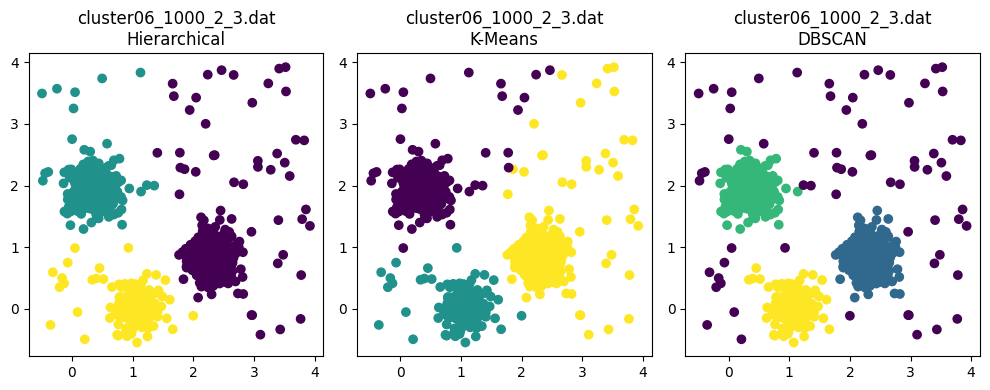

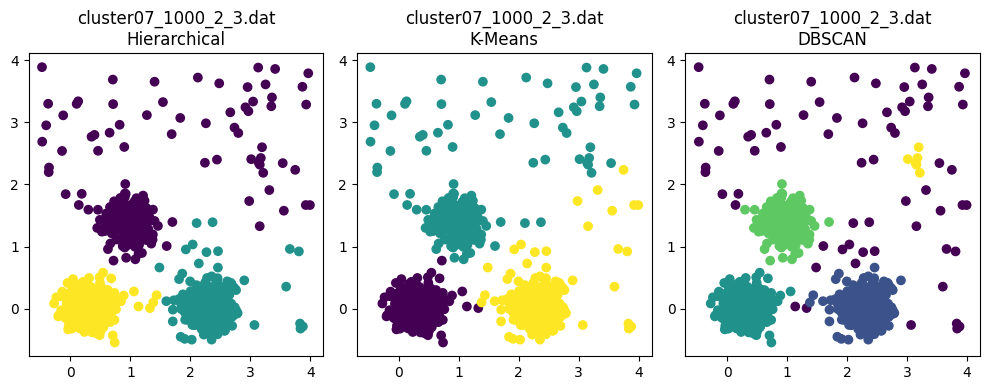

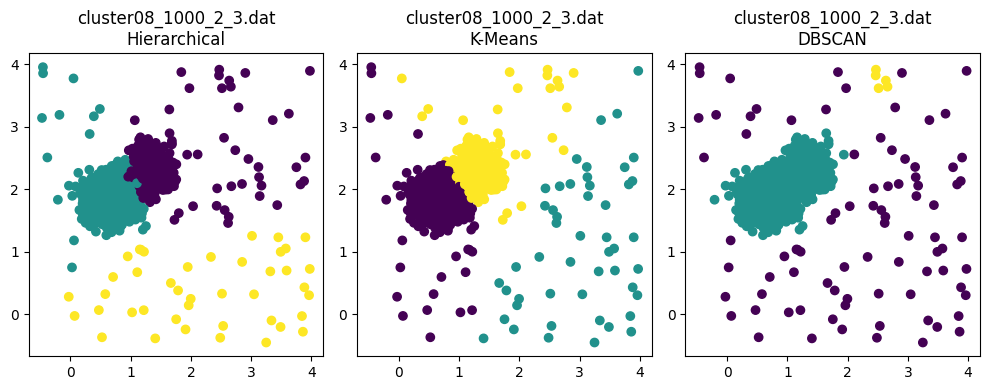

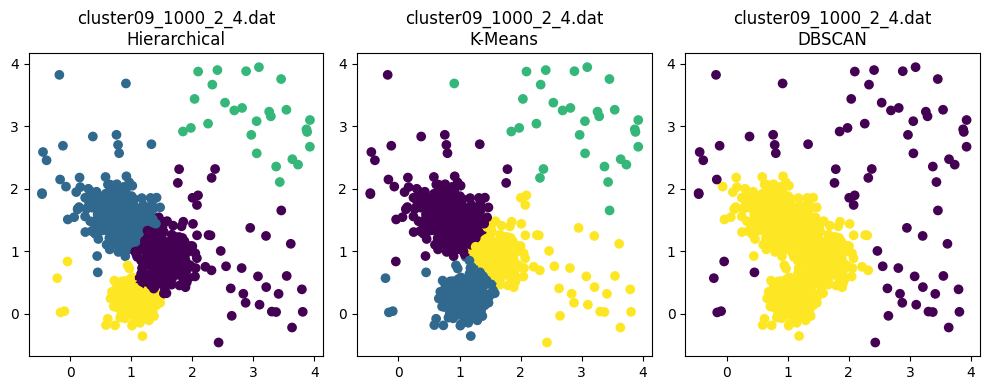

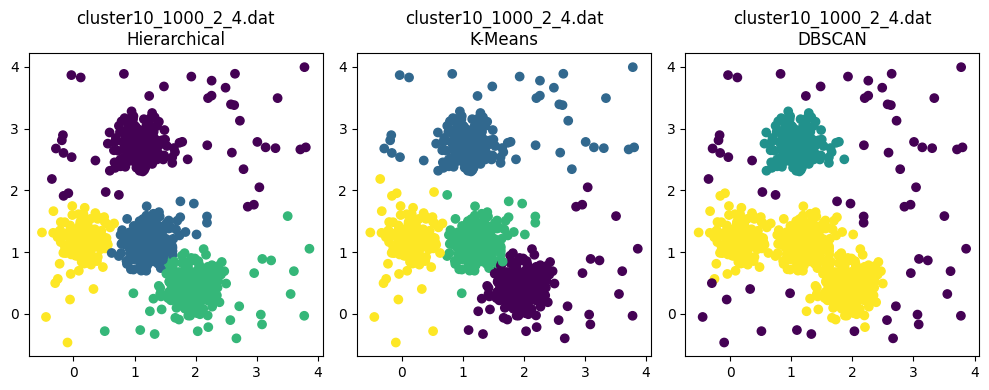

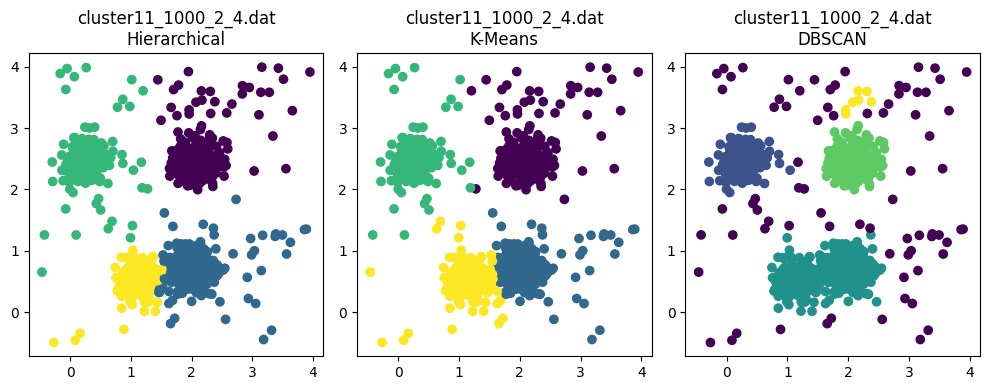

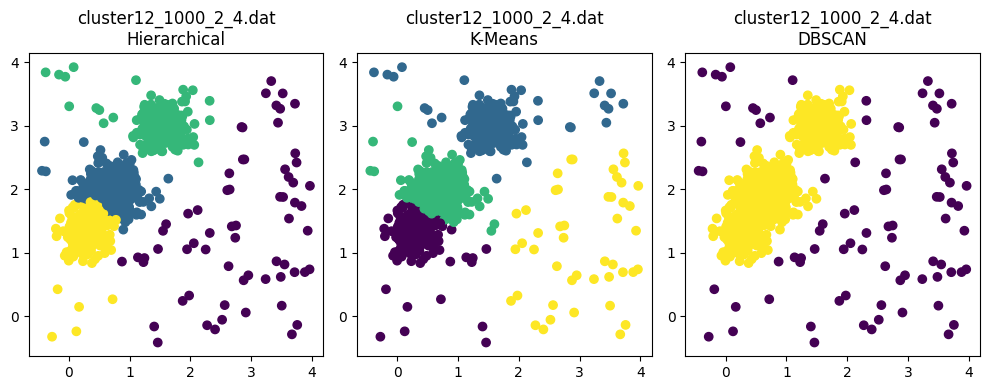

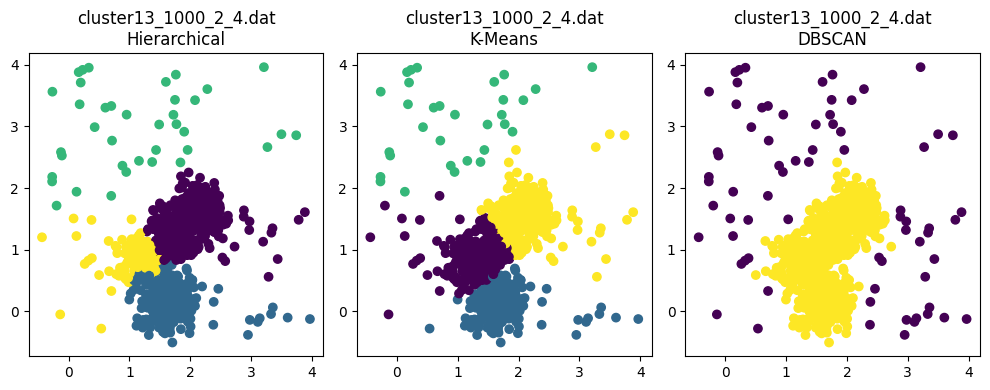

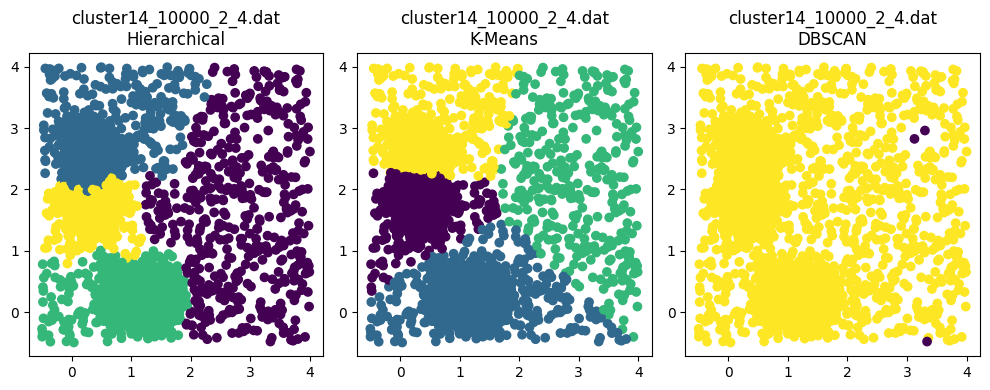

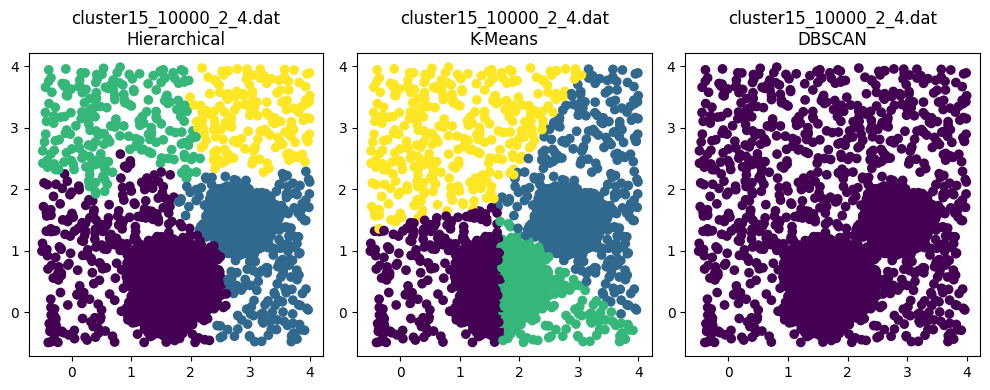

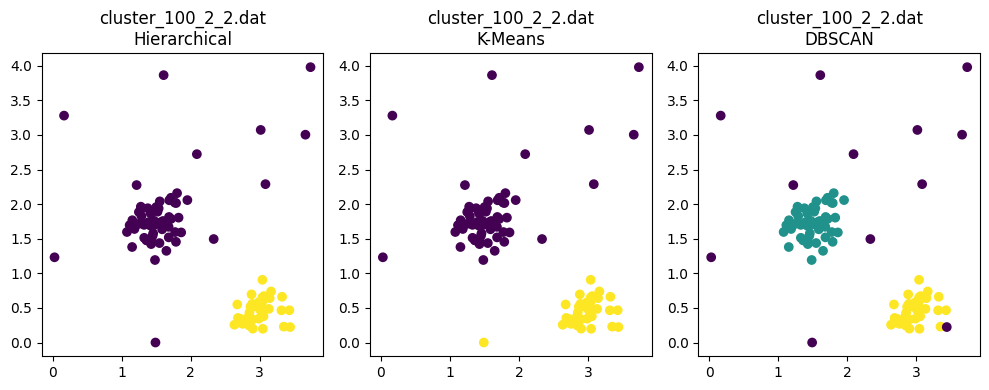

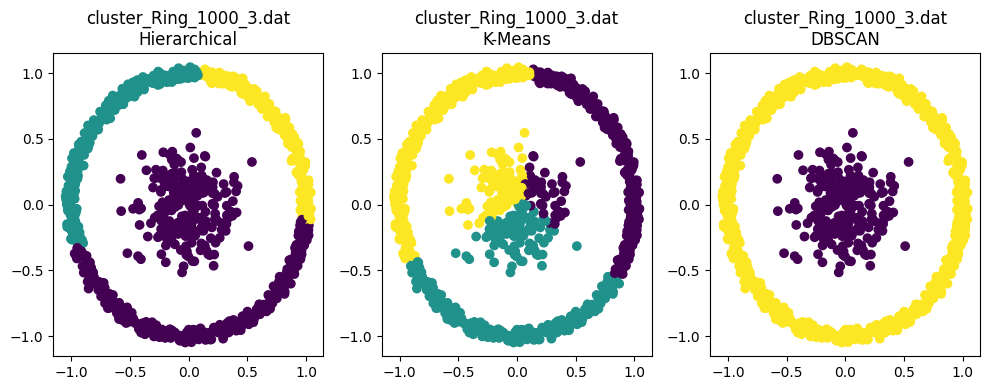

In [134]:
for filepath in sorted(two_dim):

    n, d, points = load_dat(filepath)
    n_clusters = int(filepath.name.split("_")[-1][0])

    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    hierarchical.fit(points)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42) 
    kmeans.fit(points)

    dbscan = DBSCAN(eps=0.25) #eps is max distance between points for the same cluster
    dbscan.fit(points)


    fig, axs = plt.subplots(ncols=3, figsize=(10,4))

    axs[0].scatter(points[:,0], points[:,1], c=hierarchical.labels_)
    axs[0].set_title(f"{filepath.name}\nHierarchical")

    axs[1].scatter(points[:,0], points[:,1], c=kmeans.labels_)
    axs[1].set_title(f"{filepath.name}\nK-Means")

    axs[2].scatter(points[:,0], points[:,1], c=dbscan.labels_)
    axs[2].set_title(f"{filepath.name}\nDBSCAN")

    plt.tight_layout()

### Exercise 3: Evaluate the results

In [135]:
from sklearn.metrics import davies_bouldin_score

Zero is the lowest possible score. Values closer to zero indicate a better partition.

**Advantages:**
- The computation of Davies-Bouldin is simpler than that of Silhouette scores.
- The index is solely based on quantities and features inherent to the dataset as its computation only uses point-wise distances.

**Drawbacks:**
- The Davies-Boulding index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained from DBSCAN.
- The usage of centroid distance limits the distance metric to Euclidean space.

In [136]:
filenames = []
hierarchical_dbi = []
kmeans_dbi = []
dbscan_dbi = []
for filepath in sorted(two_dim):
    filenames.append(filepath.name)
    n, d, points = load_dat(filepath)
    n_clusters = int(filepath.name.split("_")[-1][0])

    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    hierarchical.fit(points)
    hierarchical_dbi.append(davies_bouldin_score(points, hierarchical.labels_))
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42) 
    kmeans.fit(points)
    kmeans_dbi.append(davies_bouldin_score(points, kmeans.labels_))

    dbscan = DBSCAN(eps=0.25) #eps is max distance between points for the same cluster
    dbscan.fit(points)
    
    #davies_bouldin_score not defined for single cluster
    if len(np.unique(dbscan.labels_)) == 1:
        dbscan_dbi.append(99)
    else:
        dbscan_dbi.append(davies_bouldin_score(points, dbscan.labels_))


/home/kazi/Works/Dtu/data-science-computational-tools/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kazi/Works/Dtu/data-science-computational-tools/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kazi/Works/Dtu/data-science-computational-tools/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kazi/Works/Dtu/data-science-comput

In [137]:
for filepath in sorted(three_dim):
    
    filenames.append(filepath.name)
    
    n, d, points = load_dat(filepath, dim=3)
    n_clusters = int(filepath.name.split("_")[-1][0])

    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    hierarchical.fit(points)
    hierarchical_dbi.append(davies_bouldin_score(points, hierarchical.labels_))
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42) 
    kmeans.fit(points)
    kmeans_dbi.append(davies_bouldin_score(points, kmeans.labels_))

    dbscan = DBSCAN(eps=0.25) #eps is max distance between points for the same cluster
    dbscan.fit(points)
    
    #davies_bouldin_score not defined for single cluster
    if len(np.unique(dbscan.labels_)) == 1:
        dbscan_dbi.append(99)
    else:
        dbscan_dbi.append(davies_bouldin_score(points, dbscan.labels_))

/home/kazi/Works/Dtu/data-science-computational-tools/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kazi/Works/Dtu/data-science-computational-tools/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kazi/Works/Dtu/data-science-computational-tools/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kazi/Works/Dtu/data-science-comput

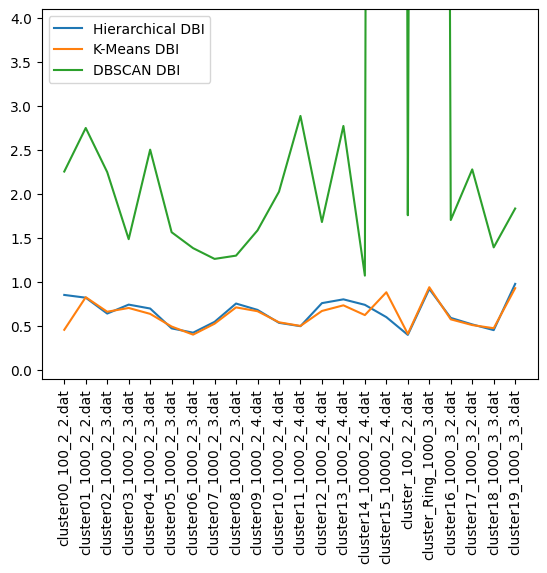

In [138]:
plt.plot(filenames, hierarchical_dbi, label="Hierarchical DBI")
plt.plot(filenames, kmeans_dbi, label="K-Means DBI")
plt.plot(filenames, dbscan_dbi, label="DBSCAN DBI")
plt.xticks(range(len(filenames)), filenames, rotation=90)
plt.legend()
plt.ylim(-0.1, 4.1)
plt.show()

### Exercise 4: Implementation

In [147]:
filepath = Path("../data/clustering/cluster_100_2_2.dat")
n, d, points = load_dat(filepath)
# print(points)

In [148]:
# It randomly selects two initial data points as the initial representatives for the two clusters.
idx = np.random.randint(len(points), size=2)
print(idx)

[65 82]


In [149]:
representative_1, representative_2 = points[idx, :]
print(representative_1)
print(representative_2)

[2.78386623 0.30234354]
[3.31569579 0.46584019]


In [150]:
cluster_1 = [representative_1]
cluster_2 = [representative_2]
labels = []

In [151]:
def centroid(cluster_i):
    return np.sum(cluster_i, axis=0) / len(cluster_i)

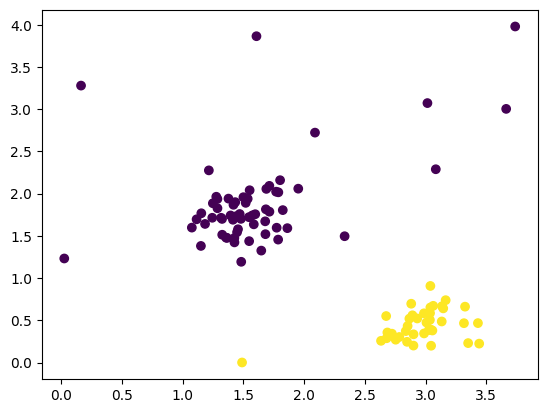

In [152]:
# (Re)assign each data point p to the cluster C_i
# for which the distance between p and the centroid
# of C_i
for p in points:
    
    # lets use euclidean distance
    d_1 = np.sqrt(np.sum(np.square(centroid(cluster_1) - p)))
    d_2 = np.sqrt(np.sum(np.square(centroid(cluster_2) - p)))
    
    if d_1 < d_2:
        cluster_1.append(p)
        labels.append(1)
    else:
        cluster_2.append(p)
        labels.append(2)    
plt.scatter(points[:, 0], points[:, 1], c=labels)
plt.show()

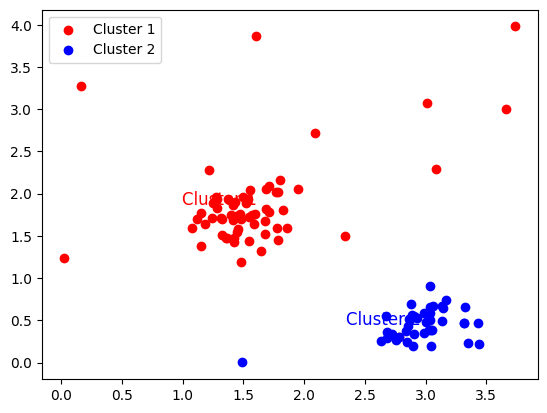

In [154]:
cluster_1_points = np.array(cluster_1)
cluster_2_points = np.array(cluster_2)

# Plot points for cluster 1 with red color and 'o' marker
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='red', marker='o', label='Cluster 1')

# Plot points for cluster 2 with blue color and 'x' marker
plt.scatter(cluster_2_points[:, 0], cluster_2_points[:, 1], c='blue', marker='o', label='Cluster 2')

# Add cluster labels to the plot
plt.text(centroid(cluster_1)[0], centroid(cluster_1)[1], 'Cluster 1', fontsize=12, color='red', ha='right')
plt.text(centroid(cluster_2)[0], centroid(cluster_2)[1], 'Cluster 2', fontsize=12, color='blue', ha='right')

plt.legend()  # Add a legend to differentiate clusters

plt.show()
